In [1]:
import gc 
import time 
import numpy as np 
import pandas as pd 
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder 
from pandas import DataFrame as DF

In [2]:
data = pd.read_csv('/data/data/UserMovie_train.txt',sep='\t')

In [3]:
mid = data['mid'].unique()
uid = data['uid'].unique()
collect_mid_encoder = {}
collect_mid_dencoder = {}
collect_uid_encoder = {}
collect_uid_dencoder = {}
for i in range(len(mid)):
    collect_mid_encoder[i] = mid[i]
    collect_mid_dencoder[mid[i]] = i
for i in range(len(uid)):
    collect_uid_encoder[i] = uid[i]
    collect_uid_dencoder[uid[i]] = i
data['mid'] = data['mid'].map(lambda x:collect_mid_dencoder[x])
data['uid'] = data['uid'].map(lambda x:collect_uid_dencoder[x])

In [4]:
user_matrix = np.zeros((len(uid),len(mid)),dtype='float16')
item_matrix = np.zeros((len(mid),len(uid)),dtype='float16')
DF(user_matrix,dtype=np.uint16).info()
to_make = np.array(data[['uid','mid','star']].values,dtype=np.uint32)
for i in range(len(to_make)):
    if i%1000000 == 0:
        print(i)
    user_matrix[to_make[i][0],to_make[i][1]] = to_make[i][2]
    item_matrix[to_make[i][1],to_make[i][0]] = to_make[i][2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48765 entries, 0 to 48764
Columns: 72656 entries, 0 to 72655
dtypes: uint16(72656)
memory usage: 6.6 GB
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000


In [6]:
value = DF(to_make)

In [7]:
value

,0,1,2
0,0,0,5
1,1,1,4
2,2,2,5
3,3,3,3
4,4,4,4
5,5,5,4
6,6,6,4
7,7,7,5
8,8,8,4
9,9,9,4


In [8]:
movie_count = value[1].value_counts()

In [9]:
movie_per_num = movie_count.values

In [10]:
import matplotlib.pyplot as plt
x1 = range(0,72656)

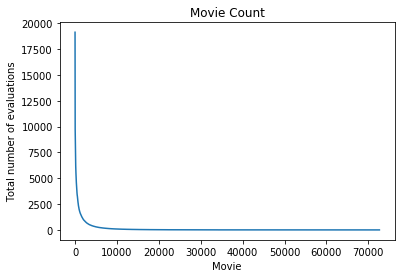

In [13]:
plt.plot(x1,movie_per_num) 
plt.title('Movie Count')
plt.xlabel('Movie')
plt.ylabel('Total number of evaluations')
plt.savefig('movie_count.png')

In [14]:
value = DF(data)
movie_categories=value['uid'].value_counts()

In [15]:
movie_categories

182      43185
82       35774
9        32324
119      31016
572      25494
46       24316
676      22971
63       16874
90       15934
382      12100
960       9387
280       9105
1252      8469
447       7977
185       7943
176       7889
524       6808
1049      6528
937       6357
773       6325
855       6107
2716      5744
1427      5638
2268      5562
2196      5114
3635      5093
558       5093
1772      5084
1627      5067
1446      4997
         ...  
48359        1
48376        1
48326        1
44024        1
46901        1
44020        1
48322        1
46907        1
48335        1
48334        1
48333        1
46880        1
47966        1
48330        1
48329        1
46888        1
46935        1
48328        1
43962        1
48373        1
48369        1
48368        1
48383        1
43924        1
48382        1
48380        1
48379        1
48377        1
47771        1
47640        1
Name: uid, Length: 48765, dtype: int64